## Requirements

In [99]:
import matplotlib.pyplot as plt
import random
import statistics

## Problem setting

What is the expected number of rolls with a fair six-faced dice until you roll 2 consecutive sixes?

An easy way to calculate this is by stating the problem as a finite-state automaton.  The automaton has three states:
1. $S_0$: last roll was not six, initial state,
2. $S_1$: last roll was six,
3. $S_2$: last two rolls were six, final state.

The expected number of throws to reach state $S_2$ can be computed as follows.  The expected number of throws in state 1 according to the law of total expectation is
$$
  E[S_0] = E[S_0 | \mathrm{next}=6] P(\mathrm{next}=6) + E[S_0 | \mathrm{next} \ne 6] P(\mathrm{next} \ne 6)
$$
Obviously,
$$
  \begin{array}{rcl}
    P(\mathrm{next} = 6) & = & \frac{1}{6} \\
    P(\mathrm{next} \ne 6) & = & \frac{5}{6}
  \end{array}
$$
and also
$$
  \begin{array}{rcl}
    E[S_0 | \mathrm{next}=6] & = & E[S_1] + 1 \\
    E[S_0 | \mathrm{next} \ne 6] & = & E[S_0] + 1
  \end{array}
$$
hence
$$
  E[S_0] = \frac{1}{6} \left(E[S_1] + 1 \right) + \frac{5}{6} \left( E[S_0] + 1 \right)
$$
Similarly for $E[S_1]$
$$
  E[S_1] = E[S_1 | \mathrm{next}=6] P(\mathrm{next}=6) + E[S_1 | \mathrm{next} \ne 6] P(\mathrm{next} \ne 6)
$$
If you are in state $S_1$, and we roll a 6, you have two successive 6's, hence you are done, and that takes a single roll, so
$$
  E[S_1 | \mathrm{next}=6] = 1
$$
On the other hand, if you are in state $S_1$ and you roll anything but a six, you are back in state $S_0$, but with an additional roll, so
$$
  E[S_1 | \mathrm{next} \ne 6] = E[S_0] + 1
$$
Hence
$$
  E[S_1] = \frac{1}{6} + \frac{5}{6} \left( E[S_0] + 1 \right)
$$
This gives the following set of equations in $E[S_0]$ and $E[S_1]$:
$$
  \begin{array}{rcl}
    E[S_0] - E[S_1] & = & 6 \\
    -5 E[S_0] + 6 E[S_1] & = & 6
  \end{array}
$$
Solving the equations yields $E[S_0] = 42$ and $E[S_1] = 36$ respectively.

## Experiment

For reproducibility, seed the random number generator.

In [90]:
random.seed(1234)

You can define a function that rolls the dice and counts the number of rools needed to get two conecutive sixes.

In [94]:
def two_sixes():
    rolls = [random.randint(1, 6), random.randint(1, 6)]
    while not (rolls[-2] == 6 and rolls[-1] == 6):
        rolls.append(random.randint(1, 6))
    return len(rolls)

You can do many sequences of rolls, each time keeping track of the required number of rolls and plot the distribution.

In [95]:
rolls = [two_sixes() for _ in range(100_000)]

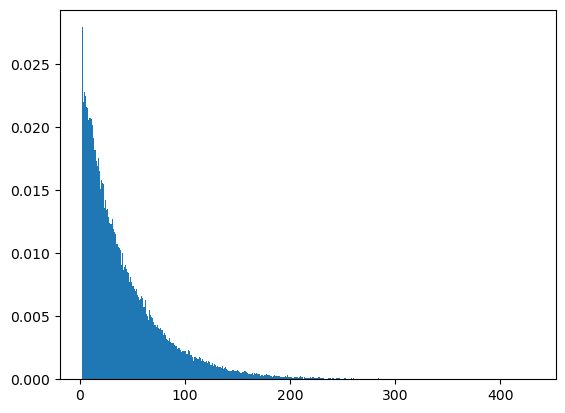

In [97]:
plt.hist(rolls, bins=max(rolls) - min(rolls) + 1, density=True);

The expected value is the average number of rolls.

In [100]:
statistics.mean(rolls)

42.16266

Indeed, this is close to 42, the expected value.

## Generalization

This can easily be generalized to arbitrary lenght sequences of sixes.

In [101]:
def n_sixes(n: int) -> int:
    rolls = [random.randint(1, 6) for _ in range(n)]
    nr_rolls = n
    while not all(roll == 6 for roll in rolls):
        rolls.pop(0)
        rolls.append(random.randint(1, 6))
        nr_rolls += 1
    return nr_rolls

In [104]:
rolls = [n_sixes(2) for _ in range(100_000)]
statistics.mean(rolls)

42.07451

You can write a function that computes the expected number of rolls given $n$.

In [105]:
def expected_rolls(n: int, nr_rolls=1_000) -> int:
    return statistics.mean(n_sixes(n) for _ in range(nr_rolls))

In [107]:
for n in range(1, 6):
    print(f'{n}: {expected_rolls(n)}')

1: 6.07
2: 41.841
3: 257.23
4: 1540.632
5: 9248.273


Clearly, this expected number of rolls grows as $O(6^n)$.